# Prediction Obesity Risk In Individuals

## Introduction

Obesity is a significant public health concern with severe implications for both individual health and healthcare systems worldwide. It is associated with numerous chronic diseases such as diabetes, cardiovascular diseases, and certain types of cancer, which can lead to reduced life expectancy and quality of life. Early diagnosis and effective management of obesity are crucial in mitigating its adverse health effects. Understanding the factors contributing to obesity, such as eating habits and physical condition, can aid in developing targeted interventions and policies to address this growing epidemic.

Project Objective
The primary objective of this project is to estimate the obesity levels in individuals from Mexico, Peru, and Colombia by analyzing their eating habits and physical condition. By leveraging machine learning techniques, we aim to classify individuals into various obesity levels, thereby facilitating better understanding and potential early intervention strategies. This analysis will provide insights into the patterns and predictors of obesity, contributing to more effective public health initiatives.





## Dataset Introduction

The dataset used for this analysis comprises information from 2111 individuals across Mexico, Peru, and Colombia. It includes 17 attributes that detail various aspects of the participants' eating habits and physical conditions. The attributes encompass a wide range of factors, including dietary intake, physical activity levels, and other lifestyle factors. Each record in the dataset is labeled with the class variable "NObesity" (Obesity Level), which categorizes individuals into seven distinct classes: Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II, and Obesity Type III.

By analyzing this dataset, we aim to identify significant patterns and build predictive models that can accurately classify individuals into their respective obesity levels. The insights gained from this study will be instrumental in developing tailored intervention programs and guiding policy decisions to combat obesity effectively in these countries.




**Attributes Related with Eating Habits**

Frequent consumption of high caloric food (FAVC),

Frequency of consumption of vegetables (FCVC),

Number of main meals (NCP),

Consumption of food between meals (CAEC),

Consumption of water daily (CH20),

Consumption of alcohol (CALC).

**Attributes Related with the Physical Condition**

Physical activity frequency (FAF),

Time using technology devices (TUE),

Transportation used (MTRANS),

**Other Variables**

Calories consumption monitoring (SCC),
Gender, Age, Height and Weight.

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import plotly.express as px

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import lightgbm as lgb
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer
from sklearn.metrics import  confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline



import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

In [2]:
train = pd.read_csv("/kaggle/input/playground-series-s4e2/train.csv")
test = pd.read_csv("/kaggle/input/playground-series-s4e2/test.csv")
submission = pd.read_csv("/kaggle/input/playground-series-s4e2/sample_submission.csv")
train.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [3]:
df = train.copy()

In [4]:
# Train Data
print("Train Data")
print(f"Total number of rows: {len(train)}")
print(f"Total number of columns: {train.shape[1]}\n")

# Test Data
print("Test Data")
print(f"Total number of rows: {len(test)}")
print(f"Total number of columns:{test.shape[1]}")

Train Data
Total number of rows: 20758
Total number of columns: 18

Test Data
Total number of rows: 13840
Total number of columns:17


In [5]:
df.shape

(20758, 18)

In [6]:
df.duplicated().sum()

0

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,20758.0,10378.500000,5992.462780,0.00,5189.250000,10378.500000,15567.750000,20757.000000
Age,20758.0,23.841804,5.688072,14.00,20.000000,22.815416,26.000000,61.000000
Height,20758.0,1.700245,0.087312,1.45,1.631856,1.700000,1.762887,1.975663
Weight,20758.0,87.887768,26.379443,39.00,66.000000,84.064875,111.600553,165.057269
FCVC,20758.0,2.445908,0.533218,1.00,2.000000,2.393837,3.000000,3.000000
NCP,20758.0,2.761332,0.705375,1.00,3.000000,3.000000,3.000000,4.000000
CH2O,20758.0,2.029418,0.608467,1.00,1.792022,2.000000,2.549617,3.000000
FAF,20758.0,0.981747,0.838302,0.00,0.008013,1.000000,1.587406,3.000000
TUE,20758.0,0.616756,0.602113,0.00,0.000000,0.573887,1.000000,2.000000


In [8]:
df.describe(include ="O").T

,count,unique,top,freq
Gender,20758,2,Female,10422
family_history_with_overweight,20758,2,yes,17014
FAVC,20758,2,yes,18982
CAEC,20758,4,Sometimes,17529
SMOKE,20758,2,no,20513
SCC,20758,2,no,20071
CALC,20758,3,Sometimes,15066
MTRANS,20758,5,Public_Transportation,16687
NObeyesdad,20758,7,Obesity_Type_III,4046


In [9]:
# There are no null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

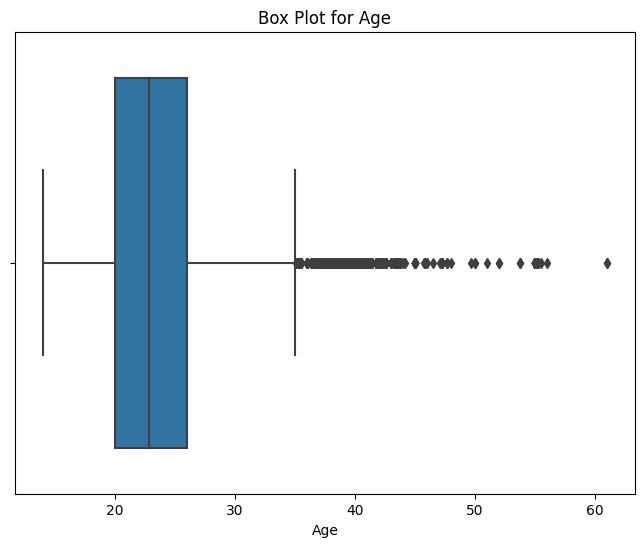

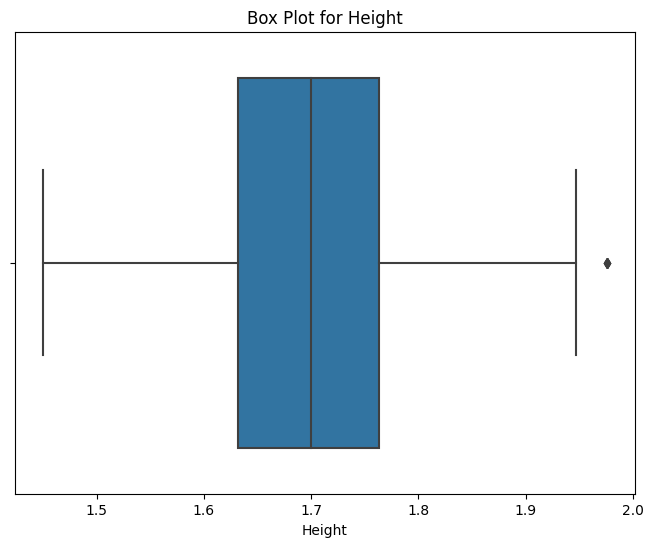

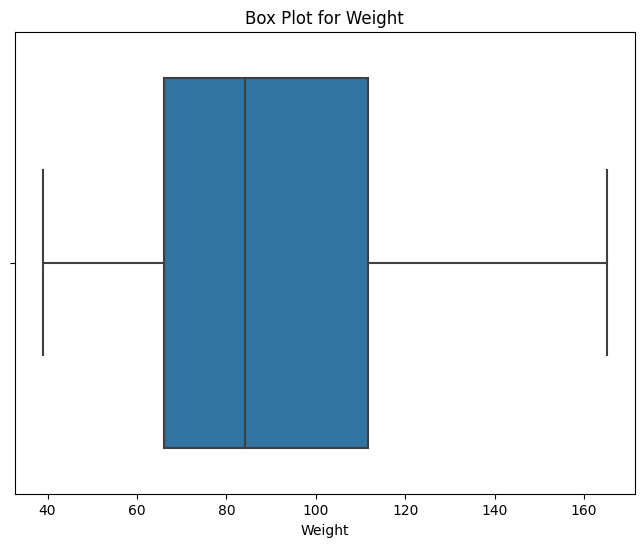

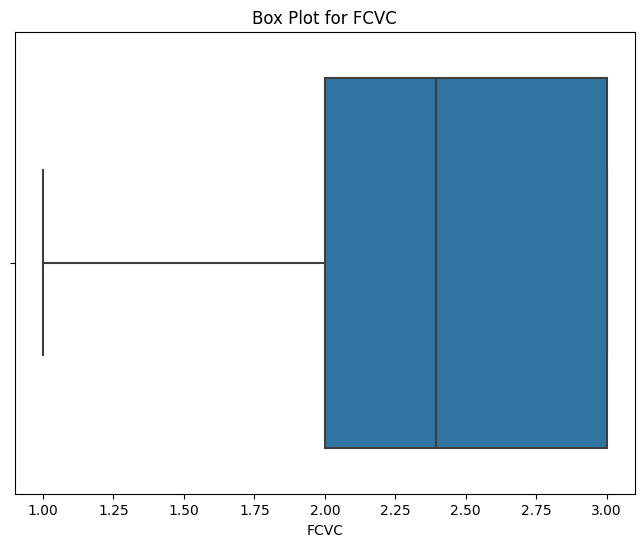

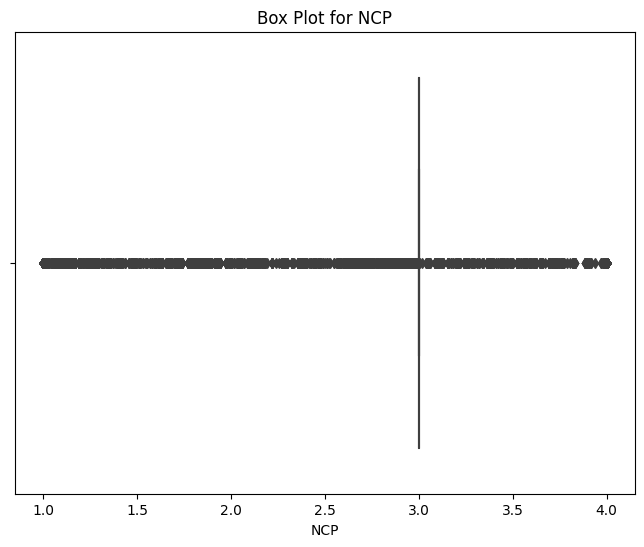

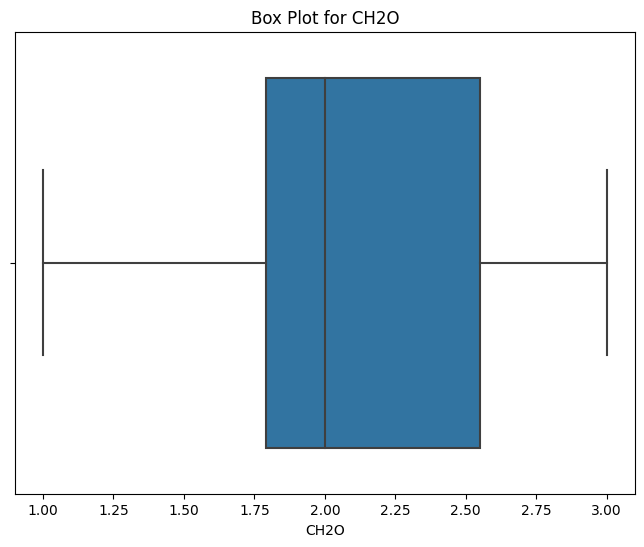

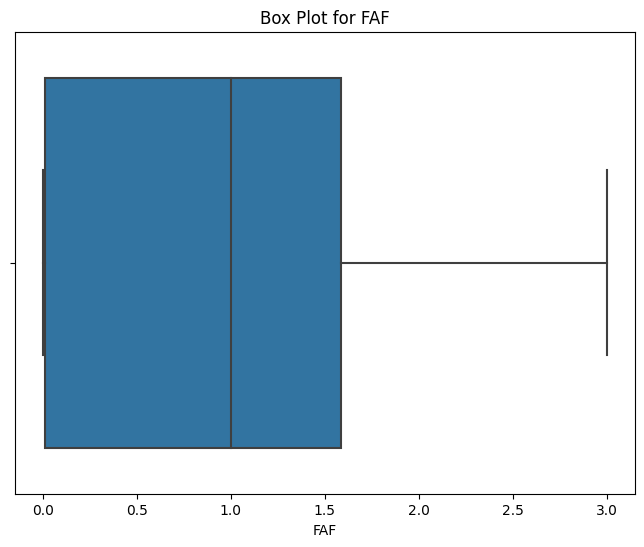

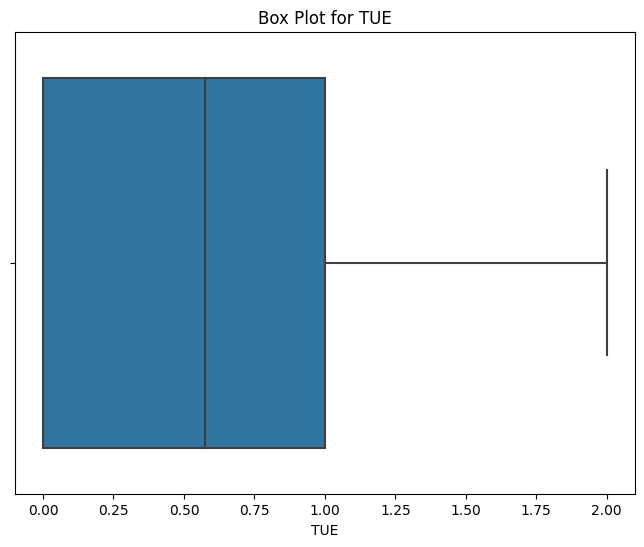

In [10]:
# Function to draw a box plot for a given column
def draw_box_plot(column_name):
    plt.figure(figsize=(8, 6))
    plt.title(f'Box Plot for {column_name}')
    sns.boxplot(x=column, data=df)
    plt.show()

# Identify numeric columns 
numeric_columns = df.select_dtypes(include = "float64")

# Draw box plots for all numeric columns
for column in numeric_columns:
  draw_box_plot(column) 

In [11]:
def plot_count(feature, title, df, colormap='Set3', fontsize=10, max_categories=20, rotation=45, text_offset=3):
  """
  This function plots the count of unique values in a feature from a pandas DataFrame.

  Args:
      feature (str): The name of the feature to plot.
      title (str): The title of the plot.
      df (pandas.DataFrame): The DataFrame containing the data.
      colormap (str, optional): The colormap to use for the bars. Defaults to 'Set3'.
      fontsize (int, optional): The font size for labels and text. Defaults to 10.
      max_categories (int, optional): The maximum number of categories to display. Defaults to 20.
      rotation (int, optional): The rotation angle for x-axis labels. Defaults to 45.
      text_offset (int, optional): The vertical offset for percentage text above bars. Defaults to 3.
  """
  
  f, ax = plt.subplots(1,1, figsize=(15,12))
  total = float(len(df))
  g = sns.countplot(x=feature, data=df, order = df[feature].value_counts().index[:max_categories], palette=colormap)
  g.set_title(title, fontsize=fontsize)
  plt.xticks(rotation=rotation, fontsize=fontsize)
  for p in ax.patches:
      height = p.get_height()
      ax.text(p.get_x()+p.get_width()/2.,
              height + text_offset,
              '{:1.2f}%'.format(100*height/total),
              ha="center", fontsize=fontsize) 
  plt.show()


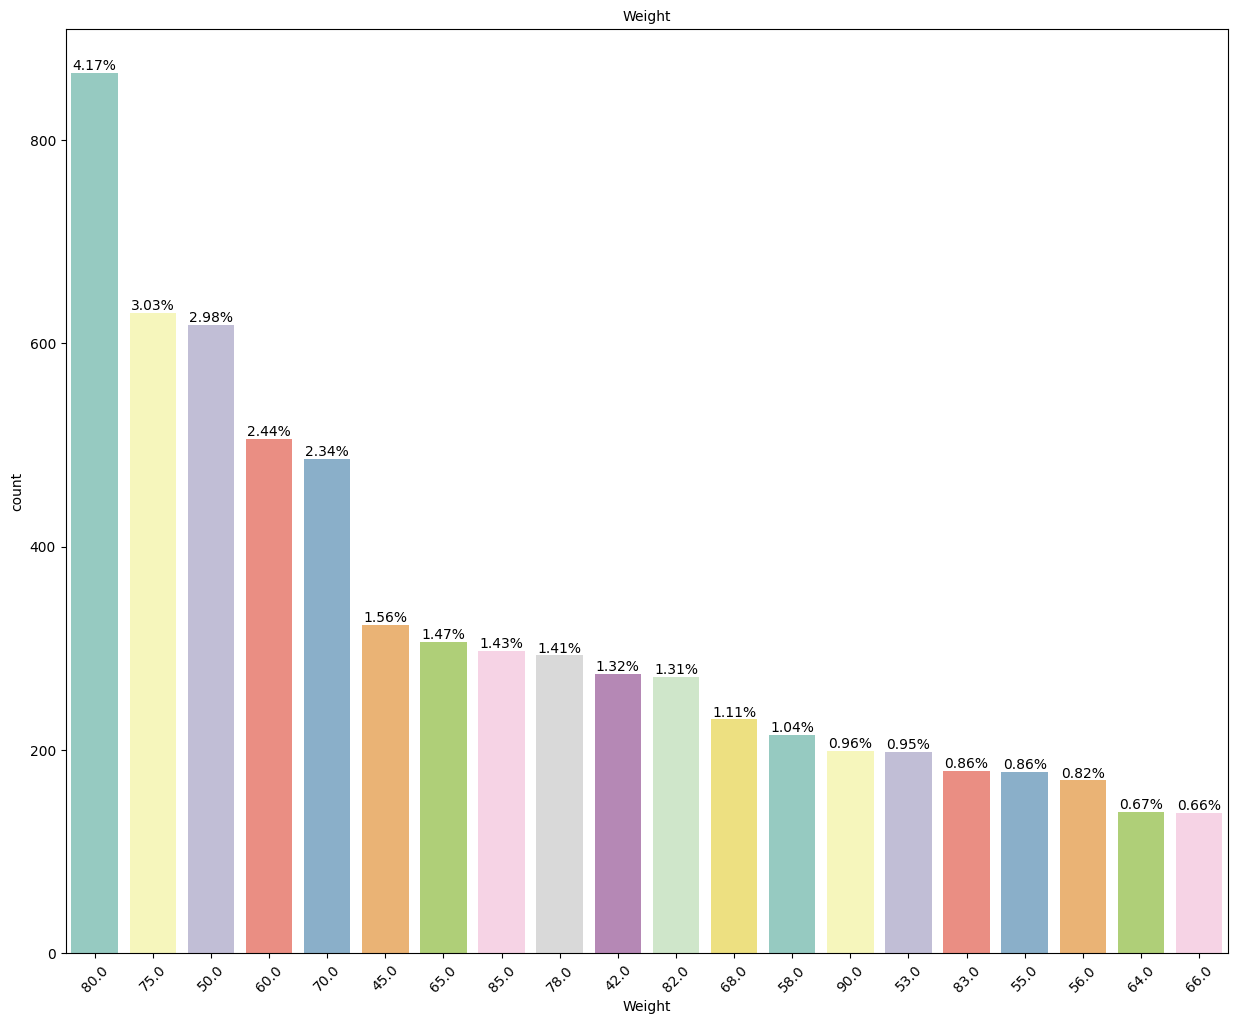

In [12]:
plot_count("Weight", "Weight", df)

We have highest number of people with Ovesity_Type III with number of 4046

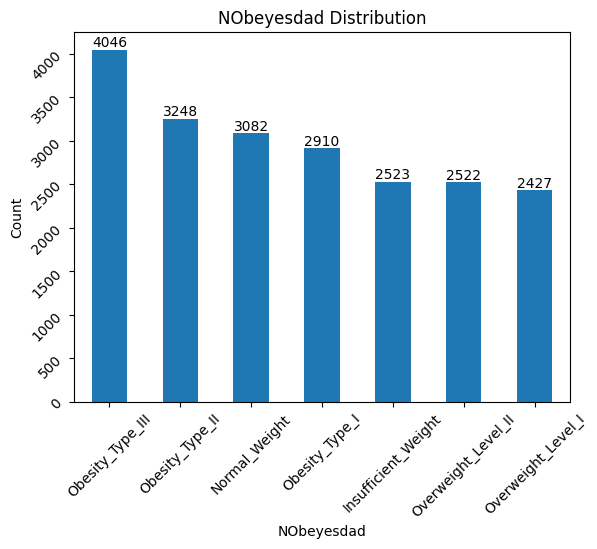

In [13]:
# Plot the bar chart
df['NObeyesdad'].value_counts().plot(kind='bar')
for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width() / 2, p.get_height() + 0.1, p.get_height(), ha='center', va='bottom')
plt.xlabel('NObeyesdad')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.title('NObeyesdad Distribution')
plt.show()

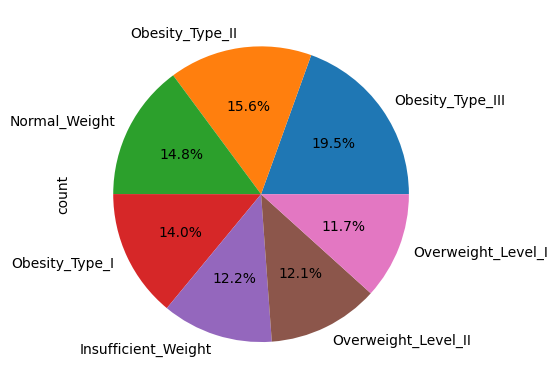

In [14]:
#It is observed that the body mass index value with the highest rate is Obesity_Type_III, with a rate of 19.5%

df["NObeyesdad"].value_counts().plot.pie(autopct='%1.1f%%');

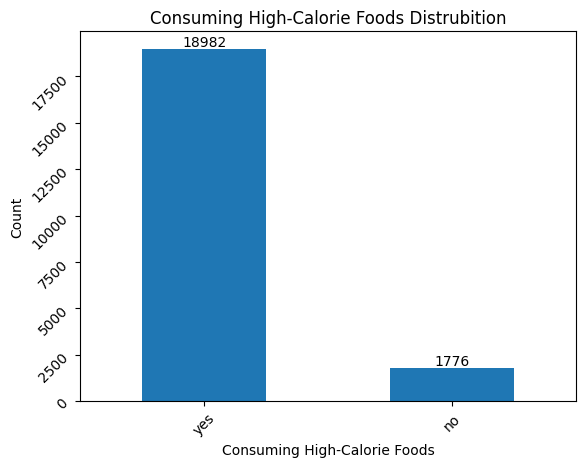

In [15]:
# Plot the bar chart
df['FAVC'].value_counts().plot(kind='bar')
for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width() / 2, p.get_height() + 0.1, p.get_height(), ha='center', va='bottom')
plt.xlabel('Consuming High-Calorie Foods')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.title('Consuming High-Calorie Foods Distrubition')
plt.show()

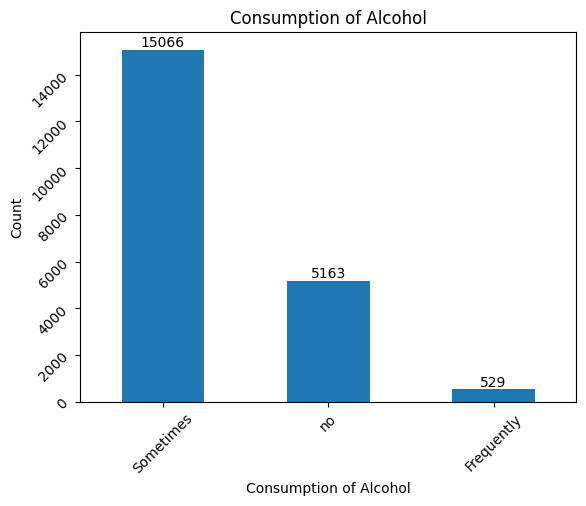

In [16]:
# Plot the bar chart
df['CALC'].value_counts().plot(kind='bar')
for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width() / 2, p.get_height() + 0.1, p.get_height(), ha='center', va='bottom')
plt.xlabel('Consumption of Alcohol')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.title('Consumption of Alcohol')
plt.show()

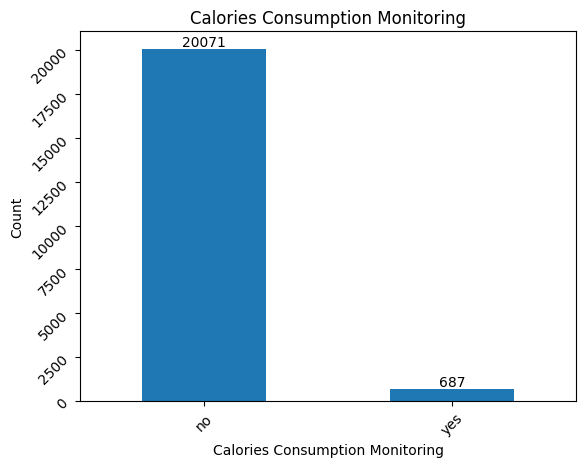

In [17]:
# Plot the bar chart
df['SCC'].value_counts().plot(kind='bar')
for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width() / 2, p.get_height() + 0.1, p.get_height(), ha='center', va='bottom')
plt.xlabel('Calories Consumption Monitoring')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.title('Calories Consumption Monitoring')
plt.show()

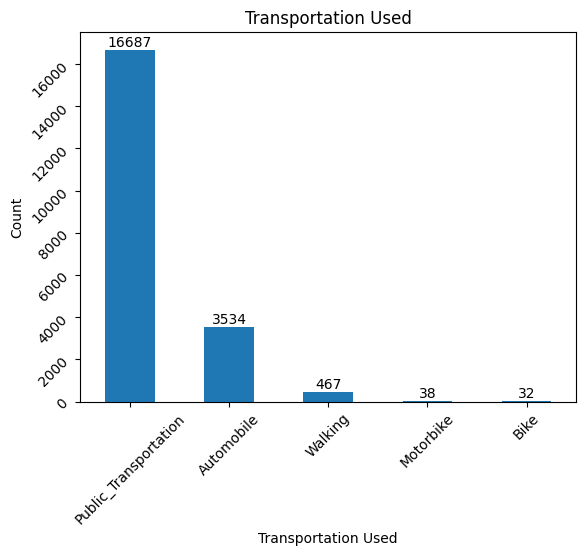

In [18]:
# Plot the bar chart
df['MTRANS'].value_counts().plot(kind='bar')
for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width() / 2, p.get_height() + 0.1, p.get_height(), ha='center', va='bottom')
plt.xlabel('Transportation Used')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.title('Transportation Used')
plt.show()

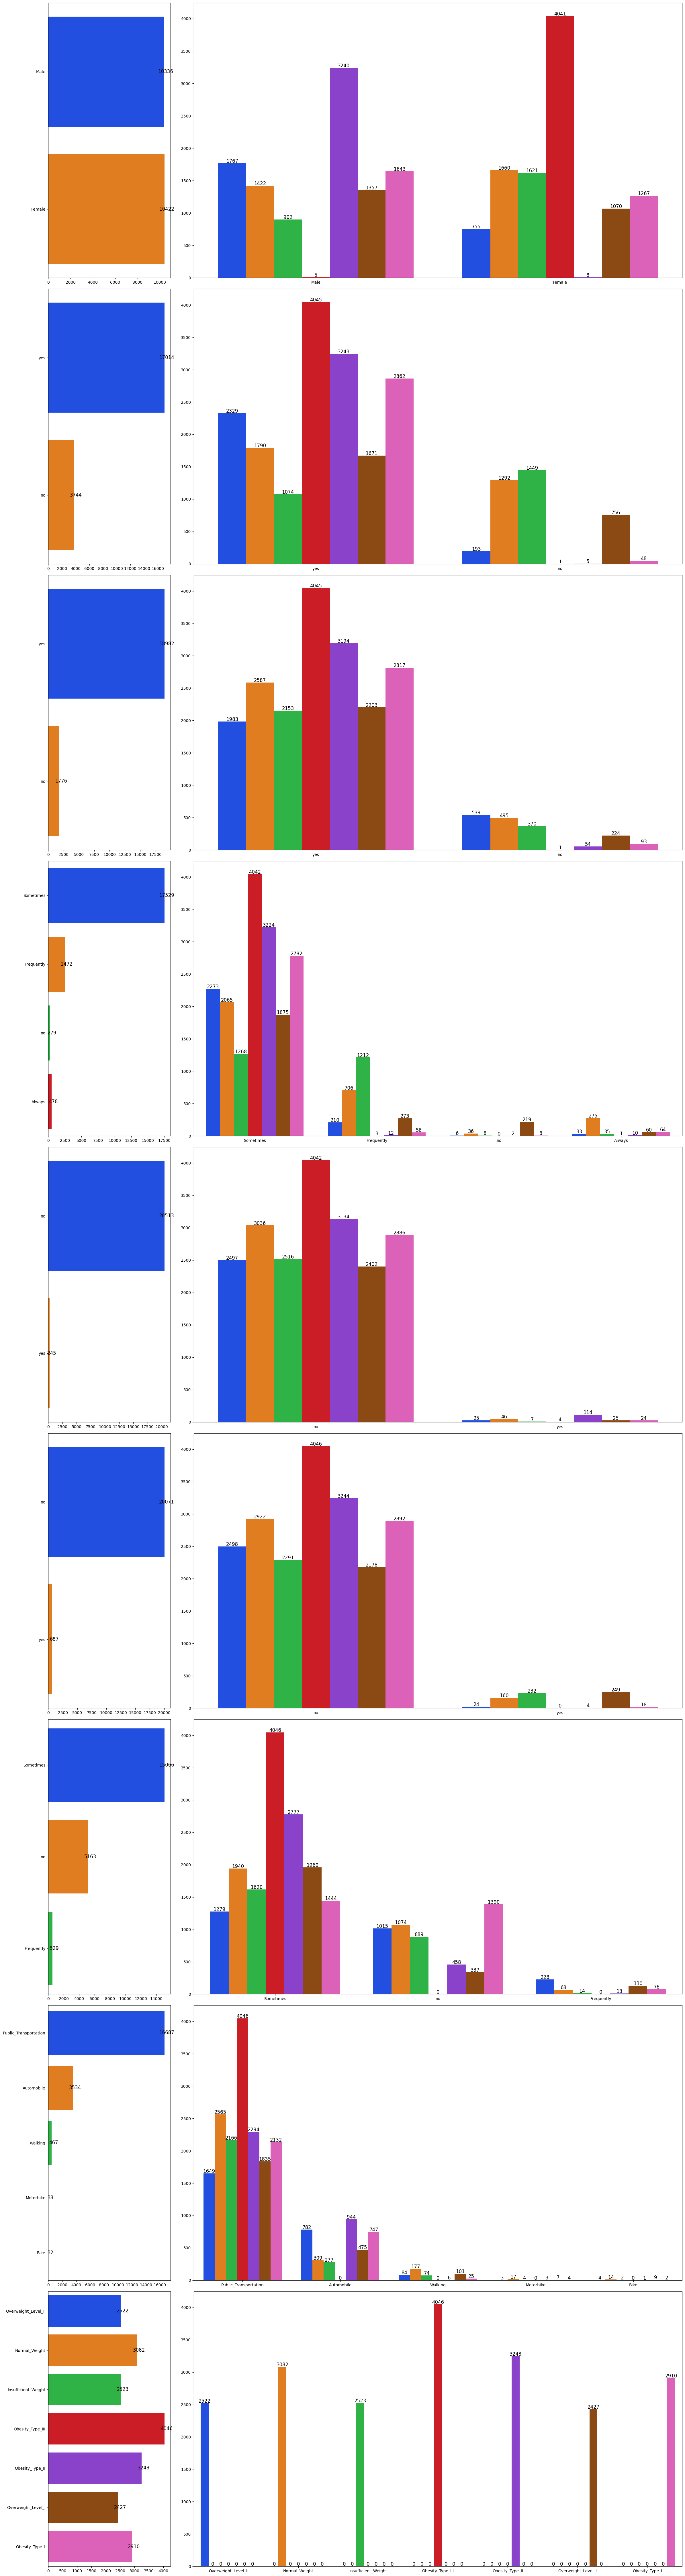

In [19]:
# Filter categorical columns
raw_cat_cols = df.select_dtypes(include=['object']).columns.tolist()

# Automatically create full form dictionary (as an example, simply changing column names)
full_form = {col: f'Full Name of {col}' for col in raw_cat_cols}

# Target variable
target_col = 'NObeyesdad'

# Function to plot categorical distributions
def plot_categorical_distributions(data, cat_cols, target_col, full_form_dict):
    """
    Plots count distributions for categorical columns and their relationship with the target variable.

    Parameters:
    - data: pandas DataFrame containing the data.
    - cat_cols: list of categorical column names.
    - target_col: name of the target column.
    - full_form_dict: dictionary mapping column names to their full form labels.
    """
    n_cols = len(cat_cols)
    fig, axs = plt.subplots(n_cols, 2, figsize=(24, n_cols * 10), width_ratios=[1, 4])
    
    for i, col in enumerate(cat_cols):
        sns.countplot(y=col, data=data, palette="bright", ax=axs[i, 0])
        sns.countplot(x=col, data=data, hue=target_col, palette="bright", ax=axs[i, 1])
        
        # Adding count labels on the bars
        for p in axs[i, 0].patches:
            axs[i, 0].annotate(f'{p.get_width():.0f}', 
                               (p.get_width(), p.get_y() + p.get_height() / 2),
                               ha='center', va='center', fontsize=12, color='black', xytext=(5, 0),
                               textcoords='offset points')
        for p in axs[i, 1].patches:
            axs[i, 1].annotate(f'{p.get_height():.0f}', 
                               (p.get_x() + p.get_width() / 2, p.get_height()),
                               ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                               textcoords='offset points')
        
        if col in full_form_dict:
            axs[i, 0].set_ylabel('')
            axs[i, 1].set_ylabel('')
        
        axs[i, 0].set_xlabel('')
        axs[i, 1].set_xlabel('')
        axs[i, 1].legend_.remove()
    
    plt.tight_layout()
    plt.show()

# Example usage
plot_categorical_distributions(df, raw_cat_cols, target_col, full_form)


## Corelations

In [20]:
def color_correlation(val):
    """
    Takes a scalar and returns a string with
    the CSS property in a variety of color scales 
    for different correlations.
    """
    if val >= 0.6 and val < 0.99999 or val <= -0.6 and val > -0.99999:
        color = 'red'
    elif val < 0.6 and val >= 0.3 or val > -0.6 and val <= -0.3:
        color = 'blue'
    elif val == 1:
        color = 'green'    
    else:
        color = 'black'
    return 'color: %s' % color

# Create a DataFrame containing only numerical data
numeric_df = df.select_dtypes(include=[np.number])

# Calculate and visualize the correlation on the numerical DataFrame
numeric_df.corr().style.applymap(color_correlation)


,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
id,1.000000,0.007634,0.012041,0.014020,0.002098,-0.000332,0.007917,0.016719,0.007667
Age,0.007634,1.000000,-0.011713,0.283381,0.034414,-0.048479,-0.016325,-0.192259,-0.296154
Height,0.012041,-0.011713,1.000000,0.416677,-0.071546,0.191383,0.183706,0.295278,0.076433
Weight,0.014020,0.283381,0.416677,1.000000,0.245682,0.095947,0.317914,-0.084845,-0.086471
FCVC,0.002098,0.034414,-0.071546,0.245682,1.000000,0.113349,0.101299,-0.089822,-0.147843
NCP,-0.000332,-0.048479,0.191383,0.095947,0.113349,1.000000,0.080949,0.100871,0.067459
CH2O,0.007917,-0.016325,0.183706,0.317914,0.101299,0.080949,1.000000,0.082932,-0.010654
FAF,0.016719,-0.192259,0.295278,-0.084845,-0.089822,0.100871,0.082932,1.000000,0.021213
TUE,0.007667,-0.296154,0.076433,-0.086471,-0.147843,0.067459,-0.010654,0.021213,1.000000


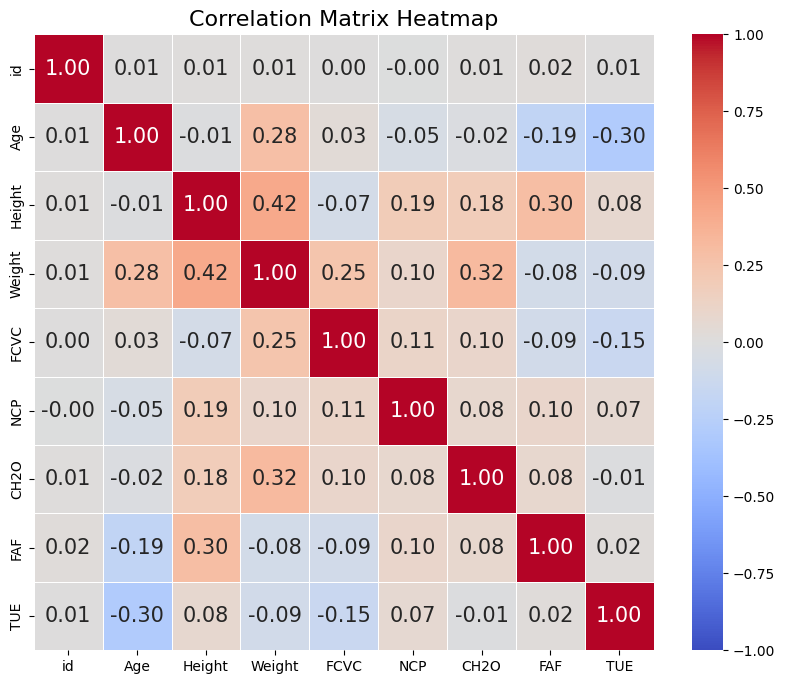

In [21]:
numeric_df = df.select_dtypes(include=[np.number])

correlation_matrix = numeric_df.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', cbar=True, fmt='.2f', 
            vmin=-1, vmax=1, linewidths=.5, annot_kws={'size': 15})  # annot_kws={'size': 10} ile font boyutunu belirliyoruz
plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.show()

## Outlier Detection

In [22]:
def detect_outliers_percentile(df, col_name, lower_percentile=0.5, upper_percentile=99.5):
    """
    This function detects outliers based on specified percentiles
    and returns the lower and upper limits and the number of outliers.
    """
    lower_limit = np.percentile(df[col_name], lower_percentile)
    upper_limit = np.percentile(df[col_name], upper_percentile)
    outlier_count = np.sum((df[col_name] < lower_limit) | (df[col_name] > upper_limit))
    
    return lower_limit, upper_limit, outlier_count

# Identify numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Check for outliers in each numeric column
out_cols = []
for col in numeric_cols:
    lower, upper, outlier_count = detect_outliers_percentile(df, col)
    print(f"{col}\nlower: {lower} \nupper: {upper}\noutlier: {outlier_count}\n*-*-*-*-*-*-*")
    if outlier_count > 0:
        out_cols.append(col)

print(out_cols)

# Remove outliers from the dataset
for col in out_cols:
    lower, upper, _ = detect_outliers_percentile(df, col)
    df = df[(df[col] > lower) & (df[col] < upper)]

df.shape

id
lower: 103.785 
upper: 20653.215
outlier: 208
*-*-*-*-*-*-*
Age
lower: 16.0 
upper: 45.0
outlier: 94
*-*-*-*-*-*-*
Height
lower: 1.5 
upper: 1.909639
outlier: 123
*-*-*-*-*-*-*
Weight
lower: 41.706283 
upper: 151.417292
outlier: 194
*-*-*-*-*-*-*
FCVC
lower: 1.0 
upper: 3.0
outlier: 0
*-*-*-*-*-*-*
NCP
lower: 1.0 
upper: 4.0
outlier: 0
*-*-*-*-*-*-*
CH2O
lower: 1.0 
upper: 3.0
outlier: 0
*-*-*-*-*-*-*
FAF
lower: 0.0 
upper: 3.0
outlier: 0
*-*-*-*-*-*-*
TUE
lower: 0.0 
upper: 2.0
outlier: 0
*-*-*-*-*-*-*
['id', 'Age', 'Height', 'Weight']


(19827, 18)

## Encoding

In [23]:
columns=['Gender','family_history_with_overweight','FAVC','SMOKE','SCC']
df=pd.get_dummies(df,columns=columns,drop_first=True,dtype=int)
test=pd.get_dummies(test,columns=columns,drop_first=True,dtype=int)


le=LabelEncoder()
label_encode_columns=['CAEC','CALC','MTRANS']
for i in label_encode_columns:
    df[i]=le.fit_transform(df[i])
    test[i]=le.fit_transform(test[i])

df['NObeyesdad']=le.fit_transform(df['NObeyesdad'])

##  Train Test Split

In [24]:
X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelling

### Vanilla Models

In [25]:
# List of models to evaluate
models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('SVM', SVC()),
    ('Naive Bayes', GaussianNB()),
    ('KNN', KNeighborsClassifier()),
    ('XGBoost', xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')),
    ('LightGBM', lgb.LGBMClassifier())
]

# DataFrame to store results
results = []

# Evaluate each model
for name, model in models:
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', model)
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })

results_df = pd.DataFrame(results)
print(results_df)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002998 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2280
[LightGBM] [Info] Number of data points in the train set: 15861, number of used features: 17
[LightGBM] [Info] Start training from score -2.133656
[LightGBM] [Info] Start training from score -1.901818
[LightGBM] [Info] Start training from score -1.948498
[LightGBM] [Info] Start training from score -1.846373
[LightGBM] [Info] Start training from score -1.623150
[LightGBM] [Info] Start training from score -2.153011
[LightGBM] [Info] Start training from score -2.132060
                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.863338   0.861521  0.863338  0.861601
1        Decision Tree  0.848966   0.847174  0.848966  0.847865
2        Random Forest  0.899899   0.899841  0.899899  0.899408
3            

### Models with Cross Validation

In [26]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [29]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Define your XGBoost model
xgb = XGBClassifier(random_state=42)

# Define your parameter grid
param_grid = {
    "n_estimators": [200],
    "max_depth": [5],
    "learning_rate": [0.1, 0.01],
    "subsample": [0.8],
    "colsample_bytree": [0.5]
}

# Initialize GridSearchCV
xgb_grid = GridSearchCV(xgb, param_grid, cv=10 ,scoring="accuracy", n_jobs=-1)

# Fit GridSearchCV with training data
xgb_grid.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.5],
                         'learning_rate': [0.1, 0.01], 'max_depth': [5],
                         'n_estimators': [200], 'subsample': [0.8]},
             scoring='accuracy')

In [30]:
xgb_grid.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.1,
 'max_depth': 5,
 'n_estimators': 200,
 'subsample': 0.8}

In [31]:
xgb_grid.best_score_

0.9107244708146501

In [32]:
y_pred = xgb_grid.predict(X_test)

In [33]:
print('Accuracy: ', accuracy_score(y_test, y_pred))

print('Classification Report:\n\n', classification_report(y_test, y_pred))

print('Confusion Matrix:\n\n', confusion_matrix(y_test, y_pred))

Accuracy:  0.913767019667171
Classification Report:

               precision    recall  f1-score   support

           0       0.92      0.94      0.93       454
           1       0.87      0.90      0.88       564
           2       0.90      0.89      0.89       573
           3       0.96      0.97      0.97       629
           4       1.00      1.00      1.00       771
           5       0.87      0.77      0.82       483
           6       0.83      0.87      0.85       492

    accuracy                           0.91      3966
   macro avg       0.91      0.91      0.91      3966
weighted avg       0.91      0.91      0.91      3966

Confusion Matrix:

 [[429  23   0   0   0   2   0]
 [ 31 506   2   0   0  22   3]
 [  1   1 508  21   3  11  28]
 [  0   0  14 612   0   0   3]
 [  0   0   0   1 770   0   0]
 [  7  40   9   0   0 373  54]
 [  0  12  30   1   0  23 426]]


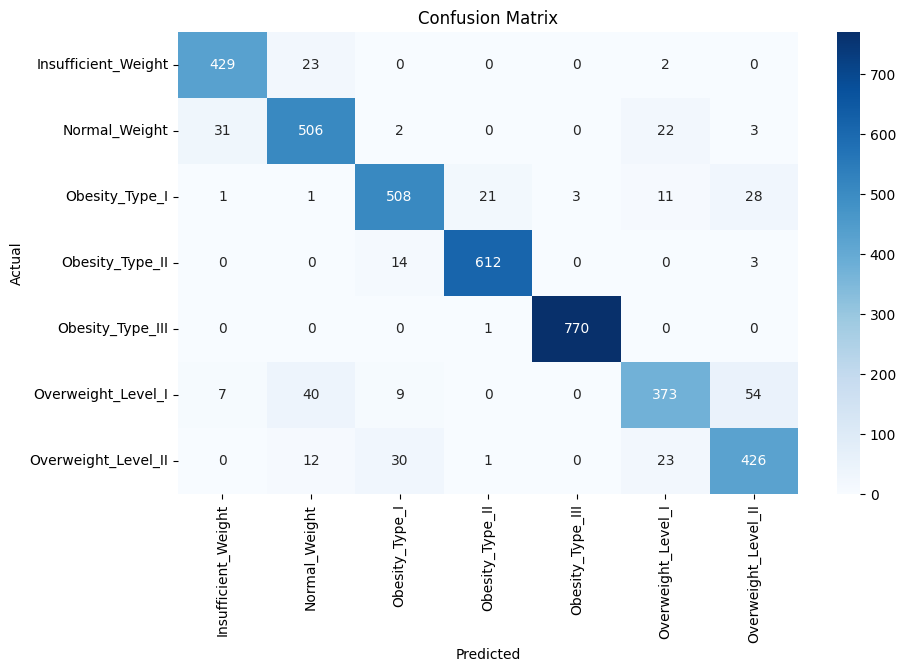

In [34]:
plt.figure(figsize=(10, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [35]:
feature_names = X.columns
best_model = xgb_grid.best_estimator_
feat_importances = pd.Series(best_model.feature_importances_, index=feature_names)

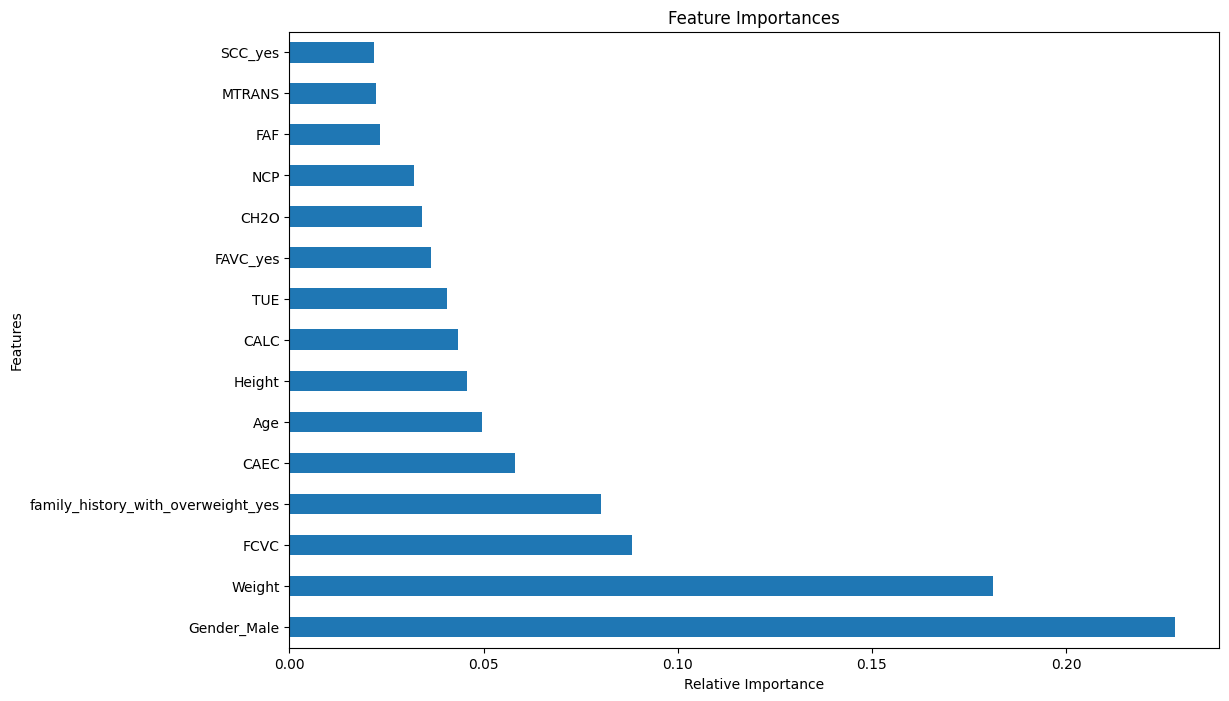

In [36]:
plt.figure(figsize=(12, 8))
feat_importances.nlargest(15).plot(kind='barh')
plt.title('Feature Importances')
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.show()

In [37]:
submission.shape

(13840, 2)

In [38]:
y_pred_test = xgb_grid.predict(test)
submission = pd.DataFrame({'id': test['id'], 'NObeyesdad': y_pred_test})
submission['NObeyesdad'] = le.inverse_transform(submission['NObeyesdad'])
submission.to_csv('submission.csv', index=False)

## Random Forest Classifier 

In [39]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define RandomForestClassifier model
rf = RandomForestClassifier(random_state=42)

# Define expanded parameter grid
param_grid = {
    "n_estimators": [200],  # Increased range
    "max_depth": [20, 30, None],  # Added more options
    "min_samples_split": [2, 5],  # Added more options
    "min_samples_leaf": [1, 2],  # Added more options
    "max_features": ['sqrt', len(df.columns)/3, 2, 4],
    "criterion": ["gini", "entropy"]  # Added criterion option
}


In [41]:
rf_model = GridSearchCV(estimator=rf,
                          param_grid=param_grid,
                          scoring='accuracy',
                          cv=10,
                          n_jobs = -1)

In [43]:
# Fit GridSearchCV with training data
rf_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [20, 30, None],
                         'max_features': ['sqrt', 6.0, 2, 4],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5], 'n_estimators': [200]},
             scoring='accuracy')

In [44]:
# Print the best parameters found and the best F1 score
best_params = rf_model.best_params_
best_score = rf_model.best_score_

print("Best parameters:\n", best_params)
print()
print("Best F1 score:", best_score)

Best parameters:
 {'criterion': 'entropy', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}

Best F1 score: 0.9017089911648156


In [45]:
y_pred = rf_model.predict(X_test)

In [46]:
print('Accuracy: ', accuracy_score(y_test, y_pred))

print('Classification Report:\n\n', classification_report(y_test, y_pred))

print('Confusion Matrix:\n\n', confusion_matrix(y_test, y_pred))

Accuracy:  0.900403429147756
Classification Report:

               precision    recall  f1-score   support

           0       0.91      0.93      0.92       454
           1       0.84      0.88      0.86       564
           2       0.89      0.88      0.89       573
           3       0.97      0.97      0.97       629
           4       1.00      1.00      1.00       771
           5       0.85      0.74      0.79       483
           6       0.79      0.83      0.81       492

    accuracy                           0.90      3966
   macro avg       0.89      0.89      0.89      3966
weighted avg       0.90      0.90      0.90      3966

Confusion Matrix:

 [[424  28   0   0   0   2   0]
 [ 35 496   1   0   0  25   7]
 [  1   1 506  18   3   8  36]
 [  0   0  16 609   0   0   4]
 [  0   0   0   1 770   0   0]
 [  6  49  10   0   0 358  60]
 [  0  14  37   3   0  30 408]]


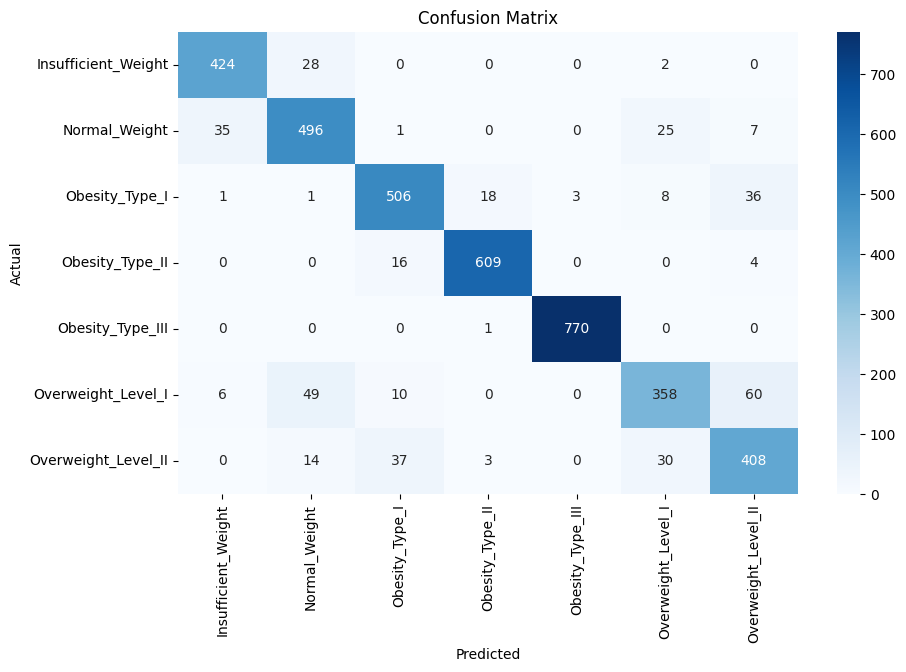

In [47]:
plt.figure(figsize=(10, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

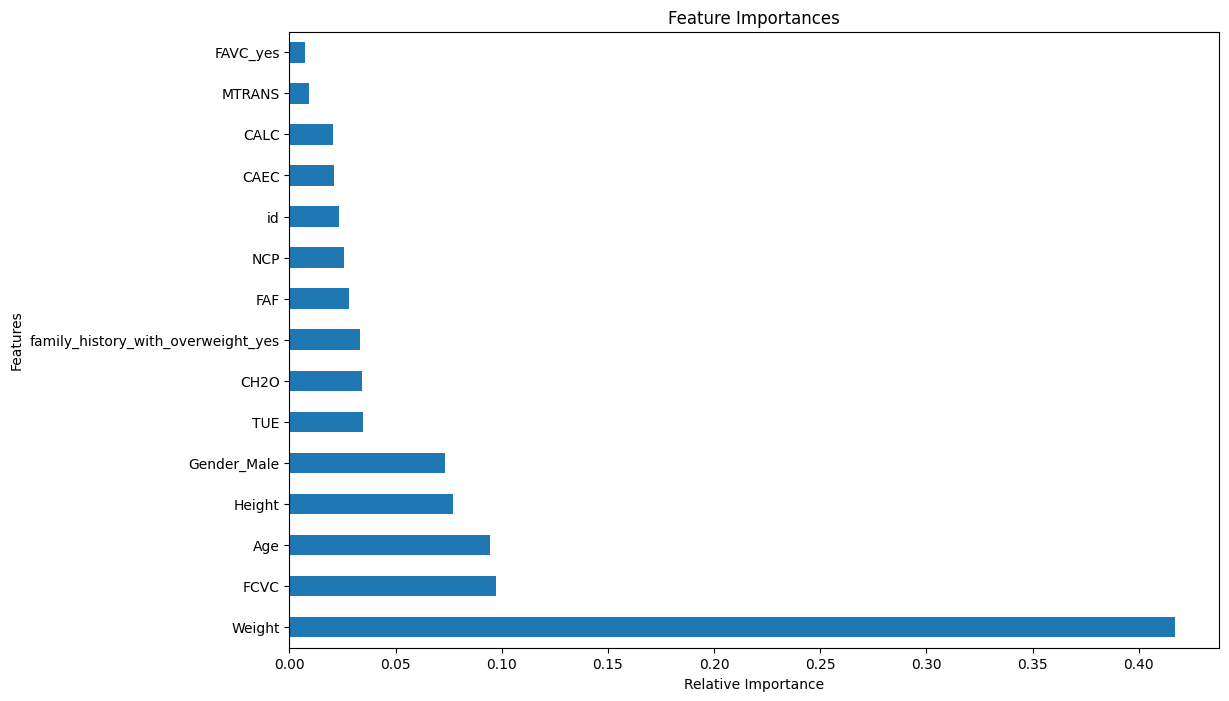

In [48]:
feature_names = X.columns

best_model = rf_model.best_estimator_

# Özellik önem derecelerini elde edin
feat_importances = pd.Series(best_model.feature_importances_, index=feature_names)

# En önemli 15 özelliği yatay bar grafiği olarak çizdirin
plt.figure(figsize=(12, 8))
feat_importances.nlargest(15).plot(kind='barh')
plt.title('Feature Importances')
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.show()